Leer el dataset desde el github.

Definir como indice la columna time.

Obtenga información del data frame.

Determine si hay null, nan en el data frame.

Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.

Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:

Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
Para la nueva columna construya un histograma de los datos.
Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:
https://pypi.org/project/fitter/

In [3]:
#Importamos librerias
!pip install -Uq fitter==1.7.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fitter import Fitter

In [15]:
# Leer el dataset desde GitHub
data = 'https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv'
df = pd.read_csv(data)
df

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
4996,4996,2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
4997,4997,2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
4998,4998,2023-05-12 22:00:00,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140


In [16]:
df = df.drop(columns = ['Unnamed: 0']) #Eliminar la columna Unnamed porque no tiene info útil

In [17]:
# Now, use 'df' instead of 'data' in the following operations
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

In [19]:
# Obtener información del DataFrame
print("\nInformación del DataFrame:\n")
# Obtener información del DataFrame
df.info()


Información del DataFrame:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                5000 non-null   float64
 1   high                5000 non-null   float64
 2   low                 5000 non-null   float64
 3   close               5000 non-null   float64
 4   tick_volume         5000 non-null   int64  
 5   spread              5000 non-null   int64  
 6   real_volume         5000 non-null   int64  
 7   MeanCloseOpen       5000 non-null   float64
 8   Diff_Close          5000 non-null   float64
 9   Diff_Open           5000 non-null   float64
 10  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 468.8 KB


In [20]:
# Determinar si hay valores nulos o NaN
print("\n¿Existen valores nulos?:", df.isnull().any().any())
print("¿Cantidad de valores nulos por columna?:\n", df.isnull().sum())


¿Existen valores nulos?: False
¿Cantidad de valores nulos por columna?:
 open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64


In [21]:
# Trabajar solo con la columna del precio de cierre 'Close'
df.rename(columns={'close': 'Close'}, inplace=True)  # Usar Pascal Case para la columna
close_prices = df[['Close']].copy()

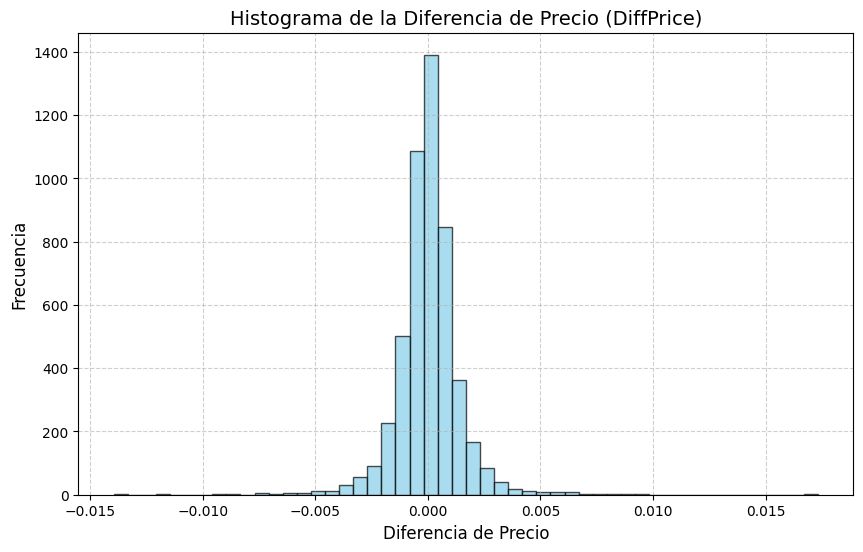

In [25]:
# Calcular la diferencia de precio entre horas
close_prices['DiffPrice'] = close_prices['Close'].diff()
# Eliminar el primer valor nulo generado por el cálculo de la diferencia
close_prices.dropna(inplace=True)

# Graficar el histograma de la columna DiffPrice
plt.figure(figsize=(10, 6))
plt.hist(close_prices['DiffPrice'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Histograma de la Diferencia de Precio (DiffPrice)", fontsize=14)
plt.xlabel("Diferencia de Precio", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Resumen de distribuciones ajustadas:

         sumsquare_error          aic          bic  kl_div  ks_statistic  \
t            2642.049132  -135.776947  -116.226568     inf      0.012482   
norm       106666.325256  3180.232148  3193.265734     inf      0.090485   
uniform    799104.859083  -688.763549  -675.729963     inf      0.443600   
expon      845123.939838  -626.066806  -613.033220     inf      0.530769   
gamma      921921.046214  -376.135738  -356.585359     inf      0.596310   

            ks_pvalue  
t        4.140587e-01  
norm     4.651743e-36  
uniform  0.000000e+00  
expon    0.000000e+00  
gamma    0.000000e+00  


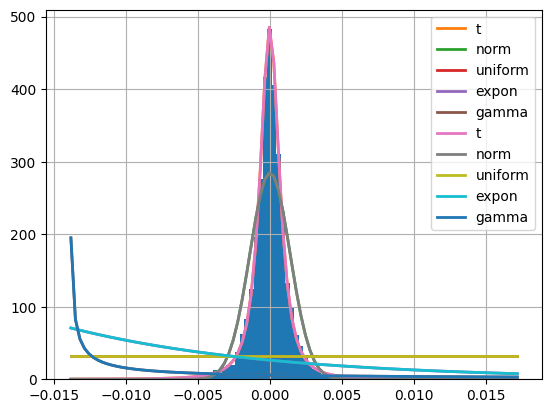

In [26]:
# Determinar la mejor distribución estadística que se ajusta a DiffPrice
f = Fitter(close_prices['DiffPrice'], distributions=['norm', 't', 'gamma', 'expon', 'uniform'])
f.fit()
print("\nResumen de distribuciones ajustadas:\n")
print(f.summary())

# Graficar el mejor ajuste
f.plot_pdf()
plt.show()

In [29]:
# Filtrar datos para el año 2023
close_prices_2023 = close_prices[close_prices.index.year == 2023]
print("\nDatos para el año 2023:\n")
print(close_prices_2023)


Datos para el año 2023:

                       Close  DiffPrice
time                                   
2023-01-02 00:00:00  1.06796   -0.00200
2023-01-02 01:00:00  1.06965    0.00169
2023-01-02 02:00:00  1.07058    0.00093
2023-01-02 03:00:00  1.06896   -0.00162
2023-01-02 04:00:00  1.06880   -0.00016
...                      ...        ...
2023-05-12 19:00:00  1.08514   -0.00038
2023-05-12 20:00:00  1.08546    0.00032
2023-05-12 21:00:00  1.08531   -0.00015
2023-05-12 22:00:00  1.08518   -0.00013
2023-05-12 23:00:00  1.08494   -0.00024

[2278 rows x 2 columns]


In [32]:
import pandas as pd

# Assuming 'df' is your DataFrame with 'time' as the index and 'Close' as a column

# Calculate average with different periodicities
avg_15d = df.groupby(pd.Grouper(level='time', freq='15D')).mean() #Change key to level
avg_1w = df.groupby(pd.Grouper(level='time', freq='W')).mean()  # Weekly average
avg_1m = df.groupby(pd.Grouper(level='time', freq='M')).mean()  # Monthly average

print("\nPromedio cada 15 días:\n", avg_15d)
print("\nPromedio semanal:\n", avg_1w)
print("\nPromedio mensual:\n", avg_1m)

# Filter data for 2023
df_2023 = df[df.index.year == 2023]


Promedio cada 15 días:
                 open      high       low     Close  tick_volume     spread  \
time                                                                         
2022-07-25  1.019610  1.020562  1.018630  1.019602  3789.107570   9.119522   
2022-08-09  1.016238  1.016969  1.015419  1.016159  2972.234848   9.208333   
2022-08-24  0.996908  0.997953  0.995986  0.996934  3684.606061   8.992424   
2022-09-08  0.999835  1.000790  0.998795  0.999753  4266.166667   8.893939   
2022-09-23  0.976705  0.978025  0.975436  0.976675  5837.492424   9.185606   
2022-10-08  0.976099  0.977243  0.975039  0.976156  5239.412500   8.900000   
2022-10-23  0.990759  0.991866  0.989720  0.990803  4990.966527   8.937238   
2022-11-07  1.021983  1.023232  1.020866  1.022115  5112.587121   8.856061   
2022-11-22  1.041266  1.042351  1.040181  1.041364  4472.219697   8.795455   
2022-12-07  1.058499  1.059469  1.057562  1.058546  3969.958333   8.738636   
2022-12-22  1.062768  1.063624  1.06190

<ipython-input-32-efd8921e9754>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  avg_1m = df.groupby(pd.Grouper(level='time', freq='M')).mean()  # Monthly average


<ipython-input-34-21586a1e8c40>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  for month, group in df_2023.groupby(pd.Grouper(freq='M')): #remove key='time' , it is the index


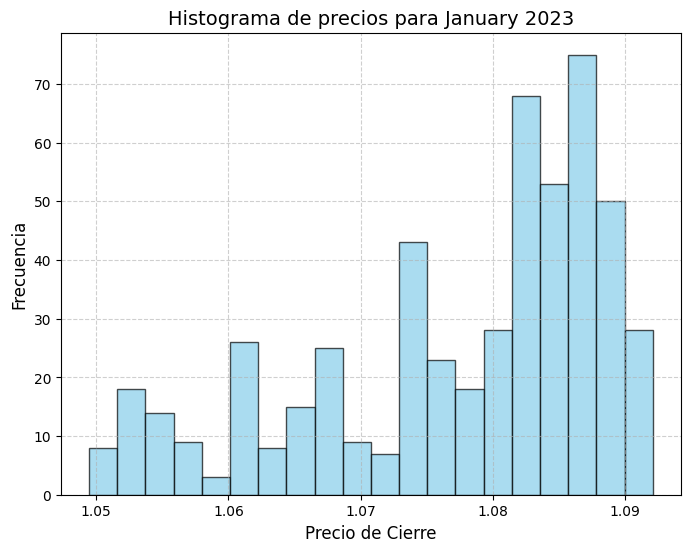

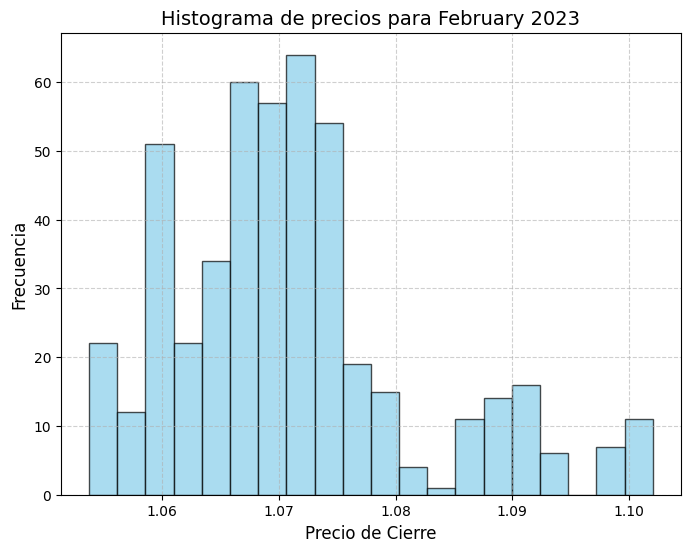

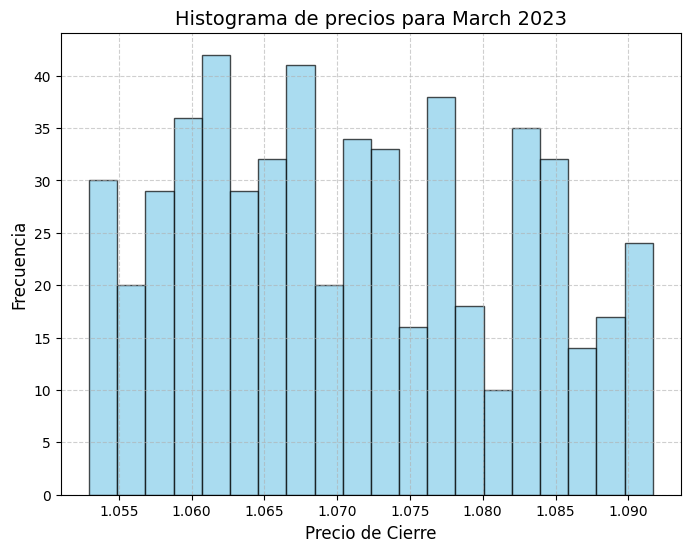

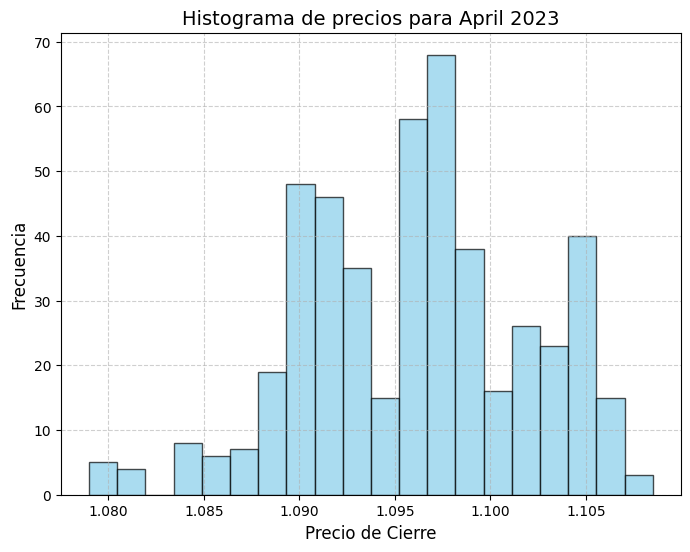

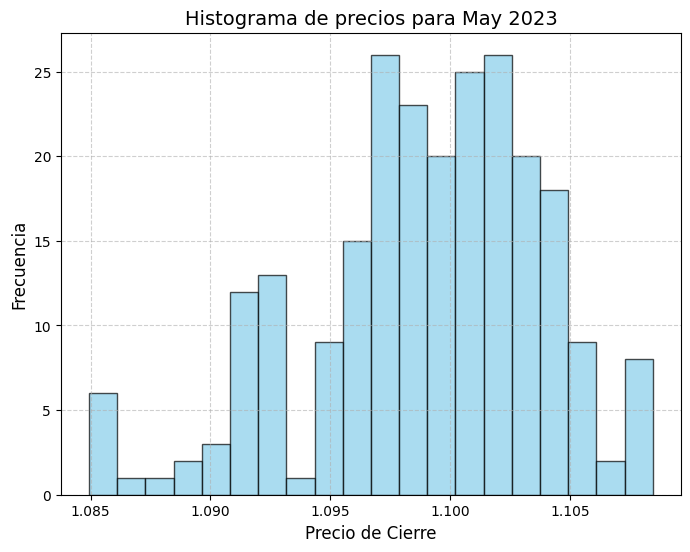

In [34]:
# Create histograms for each month of 2023
for month, group in df_2023.groupby(pd.Grouper(freq='M')): #remove key='time' , it is the index
    plt.figure(figsize=(8, 6))
    plt.hist(group['Close'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Histograma de precios para {month.strftime('%B %Y')}", fontsize=14)
    plt.xlabel("Precio de Cierre", fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

In [37]:
#Tarea #2
import pandas as pd
import seaborn as sns

# 1. Leer los datos desde una página web.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['Id', 'Diagnosis', 'RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', 'SymmetryMean', 'FractalDimensionMean', 'RadiusSe', 'TextureSe', 'PerimeterSe', 'AreaSe', 'SmoothnessSe', 'CompactnessSe', 'ConcavitySe', 'ConcavePointsSe', 'SymmetrySe', 'FractalDimensionSe', 'RadiusWorst', 'TextureWorst', 'PerimeterWorst', 'AreaWorst', 'SmoothnessWorst', 'CompactnessWorst', 'ConcavityWorst', 'ConcavePointsWorst', 'SymmetryWorst', 'FractalDimensionWorst']
df = pd.read_csv(url, names=column_names)
df

,Id,Diagnosis,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [39]:
# 2. Renombrar las columnas en formato PascalCase.
df.columns = [x.title() for x in df.columns]  # Aplica PascalCase a todas las columnas
df

,Id,Diagnosis,Radiusmean,Texturemean,Perimetermean,Areamean,Smoothnessmean,Compactnessmean,Concavitymean,Concavepointsmean,...,Radiusworst,Textureworst,Perimeterworst,Areaworst,Smoothnessworst,Compactnessworst,Concavityworst,Concavepointsworst,Symmetryworst,Fractaldimensionworst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [40]:
# 3. Utilizar los métodos head(), tail(), describe() e info() para obtener información sobre el DataFrame.
display(df.head())  # Muestra las primeras 5 filas
display(df.tail())  # Muestra las últimas 5 filas
display(df.describe())  # Muestra estadísticas descriptivas
df.info()  # Muestra información sobre el DataFrame

,Id,Diagnosis,Radiusmean,Texturemean,Perimetermean,Areamean,Smoothnessmean,Compactnessmean,Concavitymean,Concavepointsmean,...,Radiusworst,Textureworst,Perimeterworst,Areaworst,Smoothnessworst,Compactnessworst,Concavityworst,Concavepointsworst,Symmetryworst,Fractaldimensionworst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,Id,Diagnosis,Radiusmean,Texturemean,Perimetermean,Areamean,Smoothnessmean,Compactnessmean,Concavitymean,Concavepointsmean,...,Radiusworst,Textureworst,Perimeterworst,Areaworst,Smoothnessworst,Compactnessworst,Concavityworst,Concavepointsworst,Symmetryworst,Fractaldimensionworst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


,Id,Radiusmean,Texturemean,Perimetermean,Areamean,Smoothnessmean,Compactnessmean,Concavitymean,Concavepointsmean,Symmetrymean,...,Radiusworst,Textureworst,Perimeterworst,Areaworst,Smoothnessworst,Compactnessworst,Concavityworst,Concavepointsworst,Symmetryworst,Fractaldimensionworst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     569 non-null    int64  
 1   Diagnosis              569 non-null    object 
 2   Radiusmean             569 non-null    float64
 3   Texturemean            569 non-null    float64
 4   Perimetermean          569 non-null    float64
 5   Areamean               569 non-null    float64
 6   Smoothnessmean         569 non-null    float64
 7   Compactnessmean        569 non-null    float64
 8   Concavitymean          569 non-null    float64
 9   Concavepointsmean      569 non-null    float64
 10  Symmetrymean           569 non-null    float64
 11  Fractaldimensionmean   569 non-null    float64
 12  Radiusse               569 non-null    float64
 13  Texturese              569 non-null    float64
 14  Perimeterse            569 non-null    float64
 15  Arease

In [41]:
# 4. Contabilizar la cantidad de valores nulos (null o NaN) en el DataFrame.
null_counts = df.isnull().sum()
print("\nCantidad de valores nulos por columna:\n", null_counts)

# Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?
# Si hubiera valores nulos, se podrían reemplazar por la media, la mediana o la moda de la columna,
# dependiendo del tipo de dato y la distribución de los valores. También se podrían utilizar
# técnicas de imputación más avanzadas.



Cantidad de valores nulos por columna:
 Id                       0
Diagnosis                0
Radiusmean               0
Texturemean              0
Perimetermean            0
Areamean                 0
Smoothnessmean           0
Compactnessmean          0
Concavitymean            0
Concavepointsmean        0
Symmetrymean             0
Fractaldimensionmean     0
Radiusse                 0
Texturese                0
Perimeterse              0
Arease                   0
Smoothnessse             0
Compactnessse            0
Concavityse              0
Concavepointsse          0
Symmetryse               0
Fractaldimensionse       0
Radiusworst              0
Textureworst             0
Perimeterworst           0
Areaworst                0
Smoothnessworst          0
Compactnessworst         0
Concavityworst           0
Concavepointsworst       0
Symmetryworst            0
Fractaldimensionworst    0
dtype: int64


In [42]:
# 5. Identificar los valores únicos en la columna target que representan las etiquetas B y M (Benigno y Maligno, respectivamente).
unique_diagnosis = df['Diagnosis'].unique()
print("\nValores únicos en la columna Diagnosis:", unique_diagnosis)



Valores únicos en la columna Diagnosis: ['M' 'B']


<Axes: xlabel='Diagnosis', ylabel='count'>

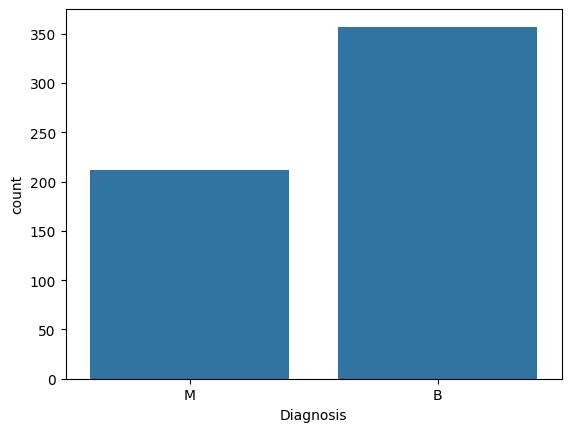

In [43]:
# 6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería seaborn y el método countplot():
sns.countplot(x='Diagnosis', data=df)
# To see the output, run the code.